# Becky's Cluster and Isolated Samples

In [175]:
import os
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits, ascii
from astropy.wcs import WCS
from astropy.table import Table
from PIL import Image
from astropy.table import Table, Column

import glob
homedir = os.getenv("HOME")

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline
mycolors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plotdir = homedir+'/research/Virgo/plots/halpha/'

In [176]:
%run ~/github/Virgo/programs/readtablesv2.py

table directory =  /Users/rfinn/research/Virgo/tables-north/v2/


# Convert Becky's Tables to Fits



In [177]:
KKtabledir = os.path.join(homedir, 'research/Virgo/koopmann-images/paper-tables/')
print(KKtabledir)
os.chdir(KKtabledir)

/Users/rfinn/research/Virgo/koopmann-images/paper-tables/


## Cluster Table

### Read in KKY01 Table 1, cluster table

In [178]:
cluster_table = os.path.join(KKtabledir, 'KKY01-table1.txt')
cluster_tab = ascii.read(cluster_table)
cluster_tab

Name,RAh,RAm,RAs,DEd,DEm,DEs,MType1,MType2,Bmag,u_Bmag,HRV,D87,l_HIDef,HIDef
,h,min,s,deg,arcmin,arcsec,,,mag,,km / s,deg,,
str9,int64,int64,float64,int64,int64,int64,str15,str15,float64,str1,int64,float64,str1,float64
NGC 4064,12,1,37.8,18,43,16,SBc(s):,SB(s)a:pec,12.3,--,913,8.8,--,0.99
NGC 4178,12,10,13.2,11,8,38,SBc(s)II,SB(rs)dm,11.89,--,378,4.7,--,-0.13
NGC 4189,12,11,14.5,13,42,11,SBc(sr)II,SAB(rs)cd,12.53,--,2115,4.3,--,0.2
NGC 4192,12,11,15.5,15,10,42,SbII:,SABab,10.92,--,-142,4.8,--,0.19
NGC 4206,12,12,44.0,13,18,7,Sc(s),Sbc:,12.77,--,702,3.8,--,0.09
NGC 4212,12,13,6.6,14,10,46,Sc(s)II-III,Sc:,11.86,--,-81,4.0,--,0.44
NGC 4216,12,13,21.5,13,25,40,Sb(s),SABb:,10.97,--,131,3.7,--,0.55
NGC 4237,12,14,38.9,15,36,7,Sc(r)II.2,SAB(rs)bc,12.37,--,867,4.4,--,0.62


### Write out fits version of KKY01 Table 1

In [179]:
ra = []
dec = []
names = []
morphs1 = []
morphs2 = []
for i in range(len(cluster_tab)):
    #print(i, cluster_tab['Name'][i])
    this_ra, this_dec = get_coords(cluster_tab['Name'][i].replace(' ',''))
    ra.append(this_ra)
    dec.append(this_dec)
    names.append(cluster_tab['Name'][i].replace(' ',''))
    morphs1.append(cluster_tab['MType1'][i])
    morphs2.append(cluster_tab['MType2'][i])


newtab = Table([names, ra, dec, morphs1, morphs2], names = ['Name','RA','DEC','MType1','MType2'])
newtab.write('KKY01-table1.fits', overwrite=True, format='fits')



### Match Cluster Table to VFS Tables

In [180]:
matched_table = np.zeros(len(v.main), dtype = newtab.dtype)
koopmann_match_flag = np.zeros(len(v.main),'bool')
for i in range(len(newtab)):
    vfindex = np.arange(len(v.main))[v.main['objname'] == newtab['Name'][i]]
    
    #print(newtab['Name'][i], v.main['objname'][vfindex][0])
    #print(vfindex[0])
    #matched_table[vfindex[0]] = newtab[i]

    for j in range(len(newtab[i])):
        matched_table[vfindex[0]][j] = newtab[i][j]
    koopmann_match_flag[vfindex[0]] = True
    #print(newtab[i])
    #print(matched_table[vfindex[0]])
matched_table = Table(matched_table)
matched_table.add_column(v.main['VFID'], index=0)
c1 = Column(koopmann_match_flag, name='kmatchflag')
matched_table.add_column(c1)
matched_table.write('vf_v2_koopmann_virgo.fits', format='fits', overwrite=True)
matched_table[matched_table['kmatchflag']]

VFID,Name,RA,DEC,MType1,MType2,kmatchflag
bytes8,str8,float64,float64,str15,str15,bool
VFID3757,NGC4561,189.03389974273878,19.322886408379865,SBcIV,SBdm,True
VFID3820,NGC4064,181.0467935655942,18.44274521321272,SBc(s):,SB(s)a:pec,True
VFID3826,NGC4293,185.3032074227746,18.382388018570527,Sa pec,(R)SB(s)0/a pec,True
VFID3851,NGC4394,186.481811256524,18.21377834536909,SBb(sr)I-II,RSBb?,True
VFID3979,NGC4450,187.12191956451247,17.085240936126365,Sab pec,SAab,True
VFID3994,NGC4498,187.9150644447541,16.852113419345407,SBc(s)II,SABd,True
VFID4046,NGC4383,186.35591072589713,16.47010188246352,Amorph,Sa pec,True
VFID4057,NGC4651,190.92692945705173,16.39332008532261,Sc(r)I-II,SAc,True
VFID4079,NGC4405,186.52957576702065,16.181025307494345,Sc/S0,SA(rs)0/a,True


## Isolated Sample

### Read in isolated galaxy table, KK06 Table 2

In [181]:
isolated_table = os.path.join(KKtabledir, 'KK06-table2.txt')

cnames = ['Name','RA','DEC','MType1','MType2','B_T','vhelio','D_Mpc','A_r','HIdef','rho_nbg','nbg_affil']
isolated_tab = ascii.read(isolated_table, format='tab', data_start=0, names=cnames)

In [182]:
isolated_tab

Name,RA,DEC,MType1,MType2,B_T,vhelio,D_Mpc,A_r,HIdef,rho_nbg,nbg_affil
str8,str10,str9,str14,str12,float64,int64,float64,float64,str6,float64,str11
NGC 578,01 30 29.1,-22 40 03,Sc(s) II,SAB(rs)c,11.17,1630,26.2,0.01,0.17,0.07,At-large
NGC 613,01 34 17.4,-29 24 58,SBb(rs) II,SB(rs)bc,10.53,1475,23.9,0.01,0.40,0.07,At-large
NGC 986,02 33 34.2,-39 02 40,SBb(rs) I-II,SB(rs)ab,11.45,2005,32.2,0.02,0.58,0.06,At-large
NGC 1249,03 10 06.4,-53 20 17,SBc,SB(s)cd,11.64,1072,17.4,0.0,0.03,0.27,At-large
IC 356,04 07 46.5,+69 48 45,\ldots,SA(s)ab pec,10.17,895,14.6,0.7,-0.17,0.08,Association
NGC 2090,05 47 02.3,-34 15 05,Sc(s) II,SA(rs)c,11.45,931,15.6,0.0,-0.15,0.14,Association
NGC 2196,06 12 09.5,-21 48 23,Sab(s) I,SA(s)ab,11.38,2321,26.8,0.25,0.31,0.1,Association
UGC 3580,06 55 31.0,+69 33 49,\ldots,SA(s)a pec:,12.2,1201,18.7,0.11,0.10,0.08,At-large
NGC 2525,08 05 37.9,-11 25 40,SBc(s) II,SB(s)c,11.55,1581,25.5,0.22,0.45,0.06,At-large


### Write a fits version of KK06 Table 2

In [183]:
ra = []
dec = []
names = []
morphs1 = []
morphs2 = []
for i in range(len(isolated_tab)):
    #print(i, cluster_tab['Name'][i])
    this_ra, this_dec = get_coords(isolated_tab['Name'][i].replace(' ',''))
    ra.append(this_ra)
    dec.append(this_dec)
    names.append(isolated_tab['Name'][i].replace(' ',''))
    morphs1.append(isolated_tab['MType1'][i])
    morphs2.append(isolated_tab['MType2'][i])


inewtab = Table([names, ra, dec, morphs1, morphs2], names = ['Name','RA','DEC','MType1','MType2'])
inewtab.write('KK06-table2.fits', overwrite=True, format='fits')



ra = 01:30:29.1, dec = -22:40:03
ra = 01:34:17.4, dec = -29:24:58
ra = 02:33:34.2, dec = -39:02:40
ra = 03:10:06.4, dec = -53:20:17
ra = 04:07:46.5, dec = +69:48:45
ra = 05:47:02.3, dec = -34:15:05
ra = 06:12:09.5, dec = -21:48:23
ra = 06:55:31.0, dec = +69:33:49
ra = 08:05:37.9, dec = -11:25:40
ra = 08:59:30.6, dec = +44:54:51
ra = 09:19:18.5, dec = +69:12:12
ra = 09:42:35.1, dec = +58:51:05
ra = 10:44:39.5, dec = +76:48:34
ra = 10:46:36.5, dec = +63:13:24
ra = 10:51:16.2, dec = +27:58:30
ra = 11:25:12.7, dec = -26:44:11
ra = 11:30:07.6, dec = +09:16:36
ra = 11:47:04.8, dec = -16:51:16
ra = 11:52:55.3, dec = +36:59:11
ra = 12:40:12.8, dec = -05:47:59
ra = 12:54:37.7, dec = +46:31:51
ra = 13:08:57.2, dec = -15:30:59
ra = 13:42:08.3, dec = +35:39:15
ra = 13:52:54.4, dec = -01:06:52
ra = 14:32:43.8, dec = +09:53:29
ra = 21:44:15.4, dec = -75:06:44
ra = 21:52:14.1, dec = -55:34:10
ra = 22:41:52.3, dec = -44:46:04
ra = 22:59:26.5, dec = -37:42:12


In [184]:
inewtab

Name,RA,DEC,MType1,MType2
str7,float64,float64,str14,str12
NGC578,23.21673795452287,-22.411089874732475,Sc(s) II,SAB(rs)c
NGC613,24.14981336802666,-29.161518318463198,SBb(rs) II,SB(rs)bc
NGC986,38.8925279307265,-38.82700899292947,SBb(rs) I-II,SB(rs)ab
NGC1249,47.89142207852062,-53.150731012395774,SBc,SB(s)cd
IC356,63.2587838479506,69.94060816127255,\ldots,SA(s)ab pec
NGC2090,87.2108217681697,-34.23675075700997,Sc(s) II,SA(rs)c
NGC2196,93.56882223004138,-21.82243790516462,Sab(s) I,SA(s)ab
UGC3580,105.24142187323415,69.49361979675446,\ldots,SA(s)a pec:
NGC2525,122.00020862155894,-11.57408291246755,SBc(s) II,SB(s)c


### Match isolated table with Virgo Filament Survey Table

In [185]:
matched_table = np.zeros(len(v.main), dtype = inewtab.dtype)
koopmann_match_flag = np.zeros(len(v.main),'bool')
for i in range(len(inewtab)):
    mflag = v.main['objname'] == inewtab['Name'][i]
    if np.sum(mflag) == 0:
        print(f"no match for {inewtab['Name'][i]}")
        continue
    vfindex = np.arange(len(v.main))[mflag]
    
    #print(newtab['Name'][i], v.main['objname'][vfindex][0])
    #print(vfindex[0])
    #matched_table[vfindex[0]] = newtab[i]
    
    for j in range(len(inewtab[i])):
        matched_table[vfindex[0]][j] = inewtab[i][j]
    koopmann_match_flag[vfindex[0]] = True
    #print(newtab[i])
    #print(matched_table[vfindex[0]])
matched_table = Table(matched_table)
print(f"number of rows in matched_table = {len(matched_table)}")
matched_table.add_column(v.main['VFID'], index=0)
c1 = Column(koopmann_match_flag, name='kmatchflag')
matched_table.add_column(c1)
matched_table.write('vf_v2_koopmann_isolated.fits', format='fits', overwrite=True)
matched_table[matched_table['kmatchflag']]

print(f"number of isolated galaxies matched to VFS = {np.sum(koopmann_match_flag)}")

no match for NGC578
no match for NGC613
no match for NGC986
no match for NGC1249
no match for IC356
no match for NGC2090
no match for NGC2196
no match for UGC3580
no match for NGC2525
no match for NGC3329
no match for NGC3673
no match for NGC3887
no match for NGC4597
no match for NGC4984
no match for NGC7098
no match for NGC7141
no match for IC5240
no match for IC5273
number of rows in matched_table = 6780
number of isolated galaxies matched to VFS = 11


## Plot Results

In [186]:
%run ~/github/havirgo/python/koopmann_update_haheaders.py

<Figure size 640x480 with 0 Axes>

pure_field
filament_member
cluster_member


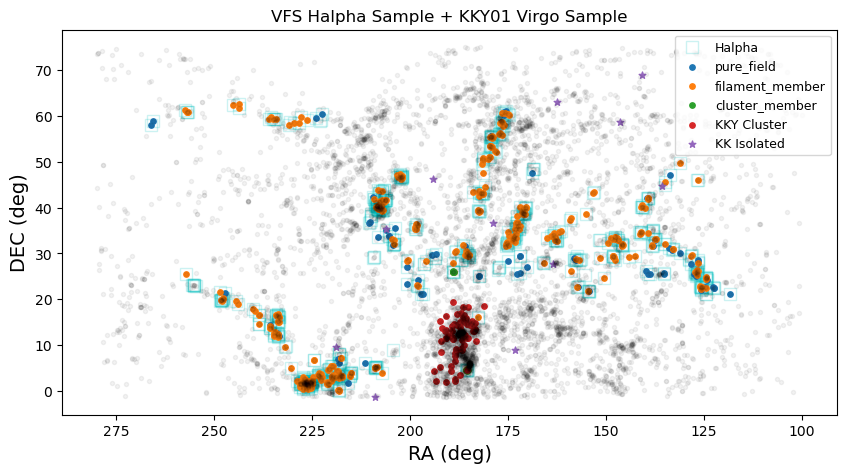

In [187]:
# plot subsamples

plt.figure(figsize=(10,5))

# plot full VFS sample as background
plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=.05)

# plot full Halpha Sample with cyan boxes
flag = v.main['HAobsflag']
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'cs',mfc='None',markersize=9,alpha=.2, label='Halpha',zorder=0)

envs = ['pure_field','filament_member','cluster_member']
for e in envs:
    print(e)
    flag = v.env[e] & v.main['HAobsflag']
    plt.scatter(v.main['RA'][flag], v.main['DEC'][flag], label=e,s=15)


# READ IN MATCHED CLUSTER SAMPLE 
vcluster = Table.read('vf_v2_koopmann_virgo.fits')
flag = vcluster['kmatchflag']
plt.scatter(vcluster['RA'][flag],vcluster['DEC'][flag],label='KKY Cluster',s=15)



# READ IN MATCHED ISOLATED SAMPLE 
viso = Table.read('vf_v2_koopmann_isolated.fits')
flag = viso['kmatchflag']
plt.scatter(viso['RA'][flag],viso['DEC'][flag],label='KK Isolated',s=25,marker="*")



plt.gca().invert_xaxis()
plt.legend(loc='upper right',fontsize=9)

plt.xlabel('RA (deg)', fontsize=14)
plt.ylabel('DEC (deg)', fontsize=14)

plt.title("VFS Halpha Sample + KKY01 Virgo Sample")
plt.show()